In [18]:
import numpy as np
import seaborn as sns
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.compose import ColumnTransformer
from sklearn.metrics import classification_report,accuracy_score
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.pipeline import Pipeline
from sklearn.model_selection import cross_val_score, train_test_split
import pandas as pd

In [3]:
data=sns.load_dataset('diamonds')

In [4]:
data.head()

,carat,cut,color,clarity,depth,table,price,x,y,z
0,0.23,Ideal,E,SI2,61.5,55.0,326,3.95,3.98,2.43
1,0.21,Premium,E,SI1,59.8,61.0,326,3.89,3.84,2.31
2,0.23,Good,E,VS1,56.9,65.0,327,4.05,4.07,2.31
3,0.29,Premium,I,VS2,62.4,58.0,334,4.20,4.23,2.63
4,0.31,Good,J,SI2,63.3,58.0,335,4.34,4.35,2.75


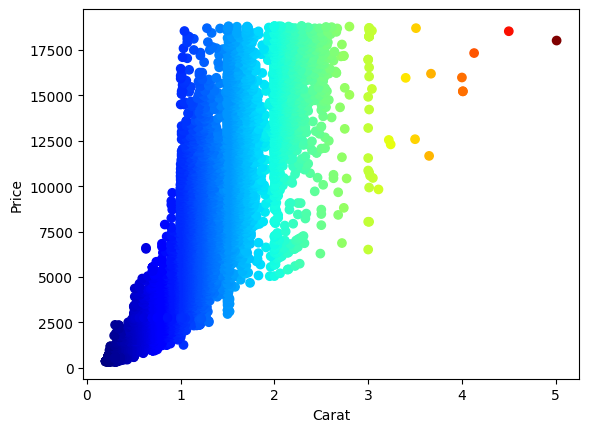

In [20]:
import matplotlib.pyplot as plt
plt.scatter(data['carat'], data['price'], c=data['carat'], cmap='jet')
plt.xlabel('Carat')
_ = plt.ylabel('Price')

In [5]:
data.columns

Index(['carat', 'cut', 'color', 'clarity', 'depth', 'table', 'price', 'x', 'y',
       'z'],
      dtype='object')

In [7]:
x=data.drop('cut', axis=1)
y=data['cut']

In [8]:
x_train, x_test, y_train, y_test=train_test_split(x,y,test_size=.3,random_state=42)

In [10]:
cf=x.select_dtypes(include=['object']).columns.tolist()
nf=x.select_dtypes(include=['float64','int64']).columns.tolist()

In [11]:
transformers=[('cat',OneHotEncoder(),cf),('num',StandardScaler(),nf)]
preprocessor=ColumnTransformer(transformers)

In [12]:
pipeline=Pipeline([("preprocessor",preprocessor),("classifier",GradientBoostingClassifier(random_state=42))])

In [13]:
cv_scores=cross_val_score(pipeline,x_train,y_train,cv=5)

In [14]:
print(cv_scores)

[0.76006356 0.75450212 0.76774364 0.75831016 0.76003178]


In [15]:
pipeline.fit(x_train,y_train)

Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('cat', OneHotEncoder(), []),
                                                 ('num', StandardScaler(),
                                                  ['carat', 'depth', 'table',
                                                   'price', 'x', 'y', 'z'])])),
                ('classifier', GradientBoostingClassifier(random_state=42))])

In [16]:
y_pred=pipeline.predict(x_test)

In [17]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

        Fair       0.90      0.92      0.91       487
        Good       0.82      0.63      0.71      1500
       Ideal       0.82      0.91      0.87      6487
     Premium       0.70      0.85      0.77      4142
   Very Good       0.66      0.42      0.51      3566

    accuracy                           0.76     16182
   macro avg       0.78      0.75      0.75     16182
weighted avg       0.76      0.76      0.75     16182



In [19]:
print(accuracy_score(y_test, y_pred))

0.7629464837473736
